#  Итоговый проект на тему «Анализ данных»
## выполнил студент: Вихарев Илья Олегович (МКм-2301-51-00)

## 1. Загрузка библиотек

In [ ]:
import numpy as np # Подключаем модуль линейной алгебры
import pandas as pd # Подключаем обработку данных
import matplotlib.pyplot as plt # Подключаем модуль визуализации
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Создание рабочей папки, загрузка датасета с Kaggle, распаковка zip. 

P.S Для проверки можно вручную скачать или воспользоваться скриптом ниже: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [ ]:
# Установить kagglehub если отсутствует. 

In [ ]:
pip install kagglehub[pandas-datasets]

In [ ]:
import os  
os.mkdir('VyatSU_Final_Project')  

In [ ]:

path = os.getcwd() + '\\VyatSU_Final_Project\\vehicles'
path

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Set the path to the file you'd like to load
file_path = ""
# Load the latest version
path_dataset = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path to dataset files:", path_dataset+'\\vehicles.csv')

In [ ]:
# перенести файлы с кеша в рабочую папку
import os
import shutil
from pathlib import Path  
# Установить целевой каталог  
path = Path(path)
path_dataset = Path(path_dataset)
os.replace(path_dataset, path)

##### Очистить кеш. (Можете вручную удалить кэш kaggle по вышеуказанному пути)

In [ ]:
shutil.rmtree(path_dataset.parents[4]) 

## 3. Предварительная обработка данных, разведочный анализ EDA.

####

In [ ]:
df = pd.read_csv('vehicles//vehicles.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

#### Посмотрим размерность датасета и его столбцы

In [ ]:
print(df.shape)
print(df.columns)

In [ ]:
print(df.info())

В датафрейме 19 столбцов имеют тип object, 5 столбцов имеют тип float64, 2 столбца int64

1. id: уникальное id объявления 
1. url: ссылка на объявление (не работает)           
1. region: регион продажи авто (город/штат США)        
1. region_url: ссылка на объявление (не работает)      
1. price: цена в долларах     
1. year: год выпуска автомобиля     
1. manufacturer: марка авто (завод-изготовитель)
1. model: модель авто         
1. condition: состояние авто     
1. cylinders: кол-во цилиндров     
1. fuel: тип потребляемого топлива          
1. odometer: пробег      
1. title_status: юридический статус авто в страховой компании
1. transmission: тип КПП
1. VIN: вин-номер авто           
1. drive: тип привода     
1. size:  размер авто (по американской классификации https://housegrail.com/types-of-car-sizes-explained)  
1. type:  тип авто     
1. paint_color: цвет авто   
1. image_url: ссылка на фото авто (не работает)    
1. description: описание   
1. county: страна (Null, что очевидно, так как это всё американские объявления)     
1. state: штат США        
1. lat: ширина (координаты)           
1. long: долгота (координаты)          
1. posting_date: дата размещения поста

### 3.1 Удаление ненужных столбцов, удаление строк с Null

In [ ]:
#Удаляем ненужные нам столбцы
df = df.drop("id", axis=1)
df = df.drop("region", axis=1)
df = df.drop("state", axis=1)
df = df.drop("model", axis=1)
df = df.drop("url", axis=1)
df = df.drop("region_url", axis=1)
df = df.drop("image_url", axis=1)
df = df.drop("description", axis=1)
df = df.drop("county", axis=1)
df = df.drop("posting_date", axis=1)
df = df.drop("VIN", axis=1)
df = df.drop("lat", axis=1)
df = df.drop("long", axis=1)
df = df.drop("title_status", axis=1)
df = df.drop("size", axis=1)


In [ ]:
# Удалим строки с пустыми значениями (Смысла нет заполнять пустые значения. Нам вполне хватит количества записей для анализа и обучения модели)
df = df.dropna()

In [ ]:
print(df.info())

### 3.2 Рассмотрим уникальные значения и перекодируем категориальные данные в численные. 

Подсчитаем количество уникальных значений в столбцах и создадим таблицу замен значений

In [ ]:

def get_unique(df: pd.DataFrame, stolbec: str):
    """
    Возвращает список замен и кол-во уникальных элементов в столбце
    """
    df_uniques = pd.melt(
        frame=df,
        value_vars=[stolbec],
    )
    df_uniques = (
        pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
        .sort_index(level=[0, 1])
        .rename(columns={"value": "count"})
        .reset_index()
    )
    return df_uniques
 
     
              
manufacturer_unique = get_unique(df,"manufacturer")                    
condition_unique = get_unique(df,"condition")           
cylinders_unique = get_unique(df,"cylinders")           
fuel_unique = get_unique(df,"fuel")                           
transmission_unique = get_unique(df,"transmission")                        
drive_unique = get_unique(df,"drive")               
type_unique = get_unique(df,"type")                
paint_color_unique = get_unique(df,"paint_color")       

         
    



In [ ]:
manufacturer_unique

In [ ]:
condition_unique

In [ ]:
cylinders_unique

In [ ]:
fuel_unique

In [ ]:
transmission_unique

In [ ]:
drive_unique

In [ ]:
type_unique 

In [ ]:
paint_color_unique

Переход к числовым данным

In [ ]:
# Словари для перехода к числовым данным
condition_dict = {'excellent': 8, 'fair': 6, 'good': 7, 'like new': 9, 'new': 10, 'salvage': 5}
cylinders_dict = {'10 cylinders': 10, '12 cylinders': 12, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, 'other': 1}

# Выполняем замену в столбцах
               
df.condition = df.condition.apply(lambda x : condition_dict[x])           
df.cylinders = df.cylinders.apply(lambda x : cylinders_dict[x])       

df.head()

In [ ]:

## Encoding categorical features
categorical_columns = ["type","paint_color","fuel","transmission","drive"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

### 3.3 Рассмотрим статистические данные через describe и удалим шум в данных. 

Метод describe показывает основные статистические характеристики каждого числового признака (типы int64 и float64): количество значений, не являющихся пропущенными, среднее значение, стандартное отклонение, диапазон, медиана, квартили 0,25 и 0,75.

In [ ]:
df.describe()

Рассмотрим гистограммы для price, odometer, year

In [ ]:
df_price = df[df['price'] < 30000]
df_price = df_price[df_price['price'] > 5000]

In [ ]:
df_odometer = df[df['odometer'] < 300000]
df_odometer['odometer'].hist(figsize=(10, 4));

In [ ]:
df_price['price'].hist(figsize=(10, 4));

In [ ]:
df['odometer'].hist(figsize=(10, 4));

По гистограммам и describe видим, что в цене и пробеге есть нулевые значения. В некоторых объявлениях специально выставлена неадекватно большая цена или пробег. Из-за этого гистограмма цены и пробега выглядит неправильно. Это нужно исправить, выбрав порог цены от 1000$ до 40000$

In [ ]:
df['year'].hist(figsize=(10, 4));

Также мы видим, что некоторые авто 1905 года выпуска. Возьмем все авто от 2000-го года, поскольку там наибольшее кол-во авто. 

In [ ]:
price_unique = get_unique(df,"price")  
price_unique

In [ ]:
year_unique = get_unique(df,"year")  
year_unique

Исправим датасет, согласно нашим замечаниям

In [ ]:
df = df[df['price'] > 1000]
df = df[df['price'] < 40000]
df['odometer'] = df['odometer']

df['odometer'] = df['odometer']//5000
df = df[df['odometer'] < 50]
df = df[df['year'] > 2000]

In [ ]:
df.info()

In [ ]:
import seaborn as sns
df_uniques = pd.melt(
    frame=df,
    value_vars=["condition","cylinders","fuel","transmission","drive","type","paint_color"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

Снова посмотрим на гистограммы

In [ ]:
df['price'].hist(figsize=(10, 4));

In [ ]:
df['odometer'].hist(figsize=(10, 4));

In [ ]:
df['year'].hist(figsize=(10, 4));

### 4. Исследовательский анализ данных

Посмотрим средние цены по маркам авто:

In [ ]:
# Должность (job_title)
manufacturers = df.manufacturer.unique().tolist()
manufacturers.sort() # Для удобства отсортируем по алфавиту
print(manufacturers)
len(manufacturers) # Подсчитаем их количество
# Посчитаем средние цены по маркам авто
n = len(manufacturers) 
mean_salaries = np.zeros(n)
for i in range(0,n):
    position = manufacturers[i] #текущая должность
    df_tmp = df[df['manufacturer'] == position] # выбираем соотвествующие записи 
    mean_salaries[i] = df_tmp['price'].mean() # считаем среднее значение
# Визуализируем уровень зарплат в зависимости от должности
fig = plt.figure(figsize=(8, 10))
plt.rc('font', size = 8 ) 
plt.barh(manufacturers, mean_salaries)
plt.show()

Наибольшую среднюю цену имеют Alfa-Romeo, Tesla, Dodge Ram, GMC, Porsche, что вполне очевидно. Alfa-Romeo - импортный итальянский автомобиль премиум сегмента. Tesla - дорогостоящий электрокар. Dodge RAM - популярный у американцев пикап, как и GMC - универсальные рабочие лошадки, но цены рознятся в зависимости от мотора и комплектации. Porsche давно зарекомендовал себя как наилучшее и наиболее качественное немецкое спортивное авто на американском рынке, пусть и за большую цену. 

Посмотрим наиболее дешевую и дорогую марку

In [ ]:

max_salary = mean_salaries.max()
min_salary = mean_salaries.min()

max_ind = (mean_salaries.tolist()).index(max_salary)
print("Максимальная стоймость у", manufacturers[max_ind])
min_ind = (mean_salaries.tolist()).index(min_salary)
print("Минимальная стоймость у", manufacturers[min_ind])

Довольно очевидно, что mercury имеет минимальную стоймость.  Данная марка авто не выпускается с 2011-го и имеет крайне сомнительную репутацию из-за того, что новые модели являются перелицензированными копиями автомобилей компании Ford и Mazda и не отличаются особой надежностью. Тем более, если смотреть данные продаж от дилеров Mercury, компания была в глубоком кризисе. 
(https://en.wikipedia.org/wiki/Mercury_(automobile))

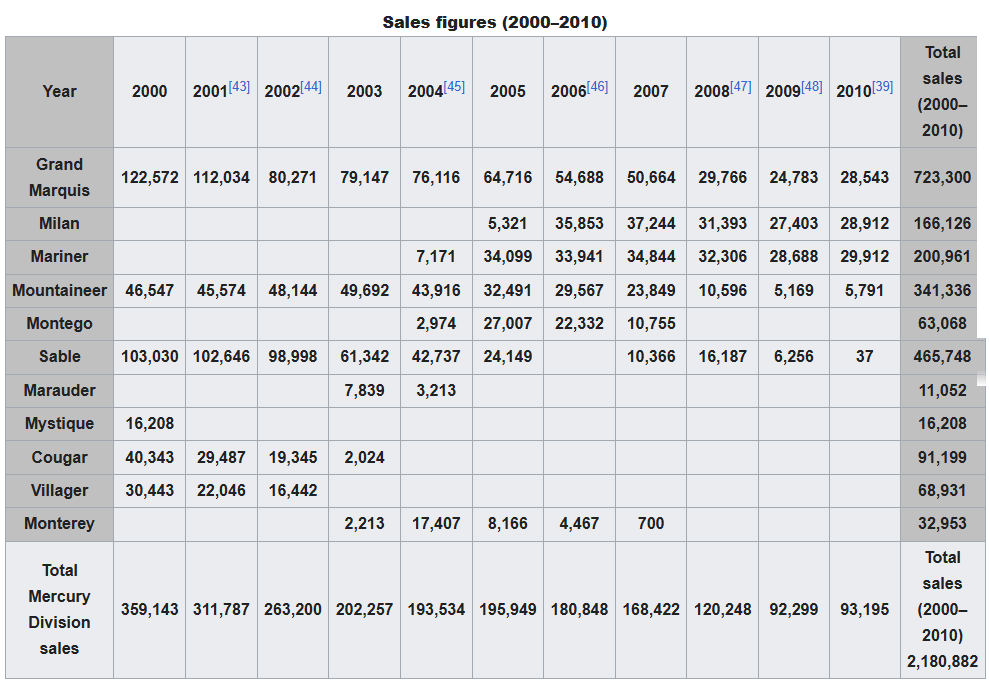

Теперь заменим марки авто на численные данные, вместо категориальных. 

In [ ]:

# Encoding categorical features
categorical_columns = ["manufacturer"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

Посчитаем коэффициенты корреляции для всего датафрейма, округлим значение до сотых.
Выведем полученную корреляционную матрицу.

In [ ]:
corr_matrix = df.corr().round(2)
corr_matrix

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train_lda = lda.fit_transform(X,y)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
df = df.drop('manufacturer',axis=1)
df = df.drop('condition',axis=1)
df = df.drop('fuel',axis=1)
df = df.drop('drive',axis=1)
df = df.drop('type',axis=1)
df = df.drop('paint_color',axis=1)

Для интереса, можно посмотреть матрицу корреляции и заметить, что, например, тип КПП на 16% зависит от типа авто, что вполне правдиво. Трансмиссия зависит от года выпуска - с развитием автомобилестроения все чаще стали применять автоматическую и роботизированную КПП, поскольку это удобно. Очевидно, что пробег и год взаимосвязаны. Топливо на 13% зависит от года и от типа трансмиссии, что тоже вполне очевидно, если вспомнить про топливный кризис США в 1970-х и массовый переход американских автомобилестроителей с V6 и V8 на R4 (рядные четверки) с передним приводом, вместо заднего, ради экономии топлива. Тогда же на рынке стали массово появлятся дешевые экономичные импортные авто (Toyota). Но, по всей видимости, тенденция не так сильно сохранилась.  

Посмотрим графики цилиндров и трансмиссии. Правда ли, что американцы любят V8? Правда ли, что люди стали массово переходить на автоматическую КПП? 

In [ ]:
features = ["cylinders", "transmission"]
df[features].hist(figsize=(10, 4));

In [ ]:
fuel_unique

In [ ]:
cylinders_unique

In [ ]:
transmission_unique

Отчасти, правда, что американцы любят авто помощнее (6 или 8 цилиндров), но есть и приверженцы малолитражных рядных четверок. Что печально, американцы стали переходить на автоматическую коробку передач, судя по количеству объявлений. 

## 4. Задача регресии. Прогнозирование цены на автомобиль

#### Решение задачи через линейную регрессию

In [ ]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df))
df_scaled.describe()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X = df_scaled.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True) 
# размерность обучающей выборки 
print(X_train.shape, y_train.shape) 
# размерность тестовой выборки 
print(X_test.shape, y_test.shape) 
pipe_lr = make_pipeline(StandardScaler(),LinearRegression())
pipe_lr.fit(X_train, y_train)
y_train_pred  =  pipe_lr.predict(X_train) 
y_test_pred  =  pipe_lr.predict(X_test)
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

In [ ]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
pipe_lr = make_pipeline(StandardScaler(),LinearRegression())
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(pipe_lr, X, y, cv=20, scoring='r2'))

Решение квадратичной регрессией 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели
poly_reg_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), # include_bias=False, т.к. LinearRegression добавит свой
    LinearRegression()
)

poly_reg_pipeline.fit(X_train, y_train)

# Прогнозирование
y_train_pred  =  poly_reg_pipeline.predict(X_train) 
y_test_pred  =  poly_reg_pipeline.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

In [ ]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
poly_reg_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False), # include_bias=False, т.к. LinearRegression добавит свой
    LinearRegression()
)
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(poly_reg_pipeline, X, y, cv=20, scoring='r2'))

#### Решение задачи через деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
# Прогнозирование
y_train_pred  =  tree_model.predict(X_train) 
y_test_pred  =  tree_model.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))



In [ ]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
tree_model = DecisionTreeRegressor()
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(tree_model, X, y, cv=20, scoring='r2'))

#### Метод k-ближайших соседей

In [ ]:
# из библиотеки sklearn импортируем регрессию по методу k-ближайших соседей 
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor()
# обучим новую модель
model2.fit(X_train, y_train)
# Прогнозирование
y_train_pred  =  model2.predict(X_train) 
y_test_pred  =  model2.predict(X_test)


# Оценка модели
test_acc = mean_squared_error(y_test_pred,y_test)**0.5
print ( f' Root Mean Squared Error (RMSE):  {test_acc:.3f} ')
print('R2:', np.round(r2_score(y_test, y_test_pred), 2))

In [ ]:
# Визуализация предсказаний
order = np.argsort(y_test)
y_test_ordered = y_test[order]
y_pred_ordered = y_test_pred[order]
order = np.argsort(y_train)
y_train_ordered = y_train[order]
y_tr_pred_ordered = y_train_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2)  =  plt.subplots ( 1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_ordered, y_pred_ordered - y_test_ordered, label='Тестовые данные')
ax2.scatter(y_train_ordered, y_tr_pred_ordered - y_train_ordered, label='Обучающие данные')
ax1.set_ylabel('Остатки')
ax2.set_ylabel('Остатки')
for ax in (ax1, ax2):
    ax.set_xlabel('Прогнозируемые значения')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min, xmax=x_max, \
               color='black', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
print('Оценка кросс-валидации на двадцати выборках: \n', cross_val_score(knn, X, y, cv=20, scoring='r2'))